In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# image = cv2.imread('./data/example.jpg', cv2.IMREAD_COLOR)  # uncomment if dataset not downloaded
%matplotlib inline
from matplotlib import pyplot as plt
from data import VOCDetection, VOCroot, AnnotationTransform
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.serialization import load_lua
import numpy as np
import cv2
from PIL import Image
from data import VOC_CLASSES as labels

if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

from ssd import build_ssd
# from models import build_ssd as build_ssd_v1 # uncomment for older pool6 model
torch.cuda.is_available()

True

In [3]:
net = build_ssd('test', 300, 21)    # initialize SSD
net.load_weights('../ssd.pytorch/weights/ssd300_mAP_77.43_v2.pth')

Loading weights into state dict...
Finished!


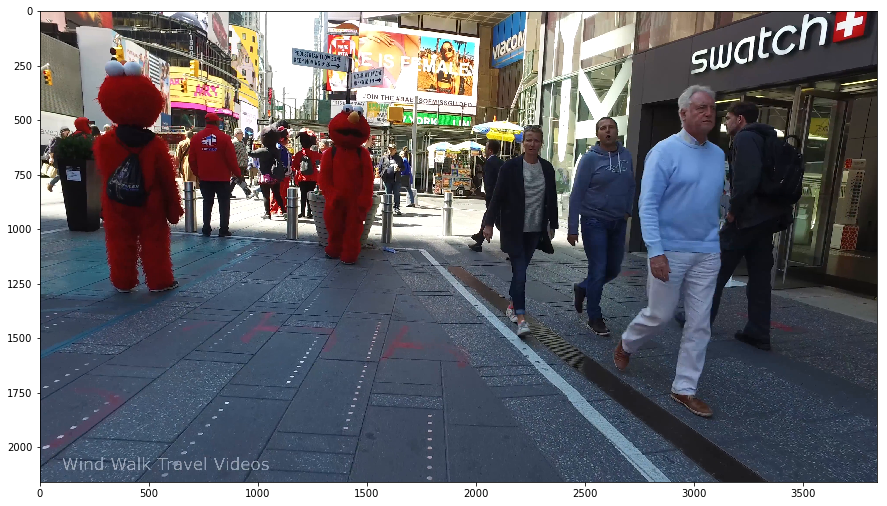

In [150]:
image = Image.open("/mnt/sde1/citywatch/ffmpeg_images/out16299.png")
rgb_image = image.convert("RGB")
# View the sampled input image before transform
plt.figure(figsize=(15,15))
plt.imshow(rgb_image)
plt.show()
plt.savefig('../figures/elmo.png')

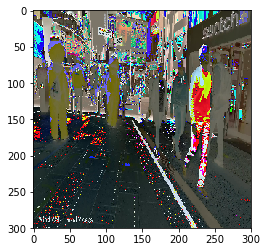

In [151]:
x = cv2.resize(np.array(rgb_image), (300, 300)).astype(np.float32)
x -= (104.0, 117.0, 123.0)
x = x.astype(np.float32)
x = x[:, :, ::-1].copy()
plt.imshow(x)
x = torch.from_numpy(x).permute(2, 0, 1)
x.size()
plt.savefig("../figures/condensed_rgb_elmo.png")

In [6]:
xx = Variable(x.unsqueeze(0)) 
# wrap tensor in Variable
if torch.cuda.is_available():
    xx = xx.cuda()
y = net(xx)

/home/cblythe2/anaconda3/envs/citywatch/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.mul(other)


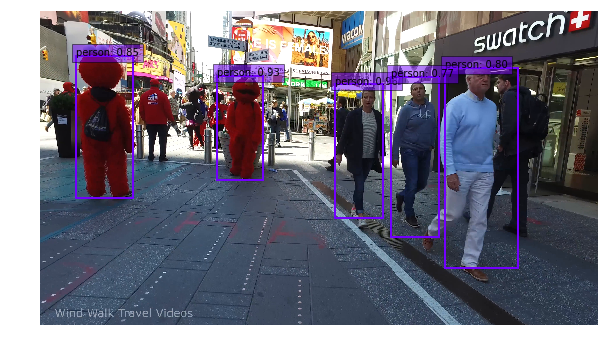

In [8]:
top_k=10

plt.figure(figsize=(10,10))
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
plt.imshow(rgb_image)  # plot the image for matplotlib
currentAxis = plt.gca()

detections = y.data
# scale each detection back up to the image
scale = torch.Tensor([np.array(rgb_image).shape[1::-1], np.array(rgb_image).shape[1::-1]])
for i in range(detections.size(1)):
    j = 0
    while detections[0,i,j,0] >= 0.6:
        score = detections[0,i,j,0]
        label_name = labels[i-1]
        display_txt = '%s: %.2f'%(label_name, score)
        pt = (detections[0,i,j,1:]*scale).cpu().numpy()
        coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
        color = colors[i]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
        j+=1
    plt.axis("off")
plt.savefig("/home/cblythe2/github/citywatch/figures/elmo_boxed.png")

In [11]:
def save_boxed_image(n):
    image = Image.open("/mnt/sde1/citywatch/ffmpeg_images/out{}.png".format(str(n)))
    rgb_image = image.convert("RGB")
    # View the sampled input image before transform
    x = cv2.resize(np.array(rgb_image), (300, 300)).astype(np.float32)
    x -= (104.0, 117.0, 123.0)
    x = x.astype(np.float32)
    x = x[:, :, ::-1].copy()
    x = torch.from_numpy(x).permute(2, 0, 1)
    xx = Variable(x.unsqueeze(0))     # wrap tensor in Variable
    if torch.cuda.is_available():
        xx = xx.cuda()
    y = net(xx)
    top_k=10
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    plt.imshow(image)  # plot the image for matplotlib
    currentAxis = plt.gca()
    detections = y.data
    # scale each detection back up to the image
    scale = torch.Tensor([np.array(image).shape[1::-1], np.array(image).shape[1::-1]])
    for i in range(detections.size(1)):
        j = 0
        while detections[0,i,j,0] >= 0.6:
            score = detections[0,i,j,0]
            label_name = labels[i-1]
            display_txt = '%s: %.2f'%(label_name, score)
            pt = (detections[0,i,j,1:]*scale).cpu().numpy()
            coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
            color = colors[i]
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
            j+=1
    plt.axis('off')
    plt.savefig("/mnt/sde1/citywatch/boxed_images/boxed_{}.png".format(str(n)))
    plt.close()

In [12]:
for n in range(1, 46113, 100):
    save_boxed_image(n)

/home/cblythe2/anaconda3/envs/citywatch/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.mul(other)


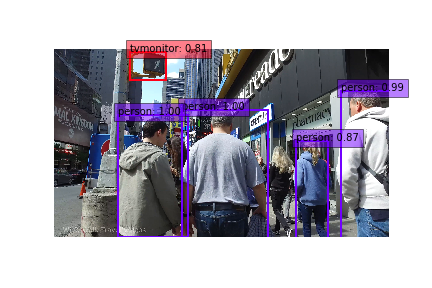

In [57]:
Image.open("/mnt/sde1/citywatch/boxed_images/boxed_2901.png")

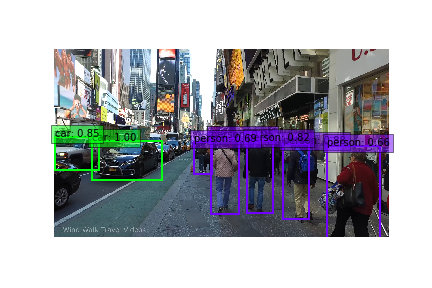

In [81]:
Image.open("/mnt/sde1/citywatch/boxed_images/boxed_34001.png")

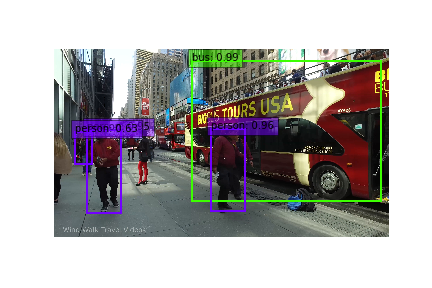

In [121]:
Image.open("/mnt/sde1/citywatch/boxed_images/boxed_41101.png")

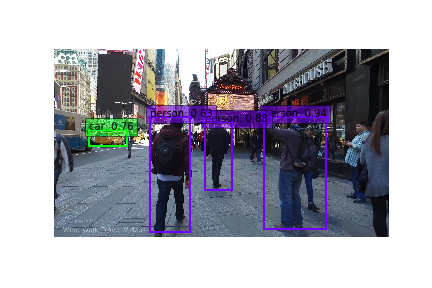

In [149]:
Image.open("/mnt/sde1/citywatch/boxed_images/boxed_20701.png")